# Sales_analise

### Importando bibliotecas necessárias

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from itertools import combinations
from collections import Counter
warnings.filterwarnings('ignore')

#### Juntando 12 meses de dados de venda em um único arquivo

In [ ]:
#Lendo todos os arquivos de um diretório
arquivos = [ arquivo for arquivo in os.listdir("./Sales_Data")]

#Criando um dataFrame vazio
sales_data = pd.DataFrame()

#Adicionando os dataFrames ao dataFrame vazio
for arquivo in arquivos:
    data_frame_adicionar = pd.read_csv("./Sales_Data/"+arquivo)
    sales_data = pd.concat([sales_data,data_frame_adicionar])
    
#Salvando nosso dataFrame geral em um csv
sales_data.to_csv("./Sales_Data/Sales_Data.csv")

#### Lendo o dataFrame geral

In [4]:
#Podemos notar que é uma base de dados sobre eletrônicos
sales_data = pd.read_csv("./Sales_Data/Sales_Data.csv")
#Apagando colunas desnecessárias
sales_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis='columns', inplace=True)
#Apagando os registros duplicados
sales_data = sales_data.drop_duplicates()
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
217240,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
217241,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### 1° Pergunta: Qual foi o melhor mês para as vendas? E quanto dinheiro foi ganho nesse mês

#### Apagando os valores nan

*  Valores Nan(Not a number), podem atrapalhar em diversos cálculos prejudicando nossa análise

In [5]:
# Extraindo o index das linhas que contém os valores Nan
Dfnan = sales_data[pd.isnull(sales_data["Order ID"])]
valores_nan = Dfnan.index.values.tolist()
valores_nan

#Apagando os valores pelos index
sales_data.drop(sales_data.index[valores_nan], inplace=True)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
217240,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
217241,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


####  Adicionando uma coluna que contém apenas os meses 

* Extraimos das Strings Order Date o mês, por exemplo se temos 04/19/19 pegamos da primeira letra até a segunda ou seja: 04.

In [6]:
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
217240,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
217241,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Retirando as ocorrências de or em Month

* Alguns dos registros não eram meses realmente e podemos assim descartá-los  

In [7]:
sales_data = sales_data[sales_data["Month"]!='Or']
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
217240,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
217241,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Transformando os meses, quantity ordered e price each em tipos numéricos

* Para poder efetuar o cálculo do total de vendas de cada mês, precisamos multiplicar a Quantidade encomendada pelo preço de cada produto, mas para isso antes precisamos deixar esses valores como numéricos 


In [8]:
sales_data["Month"] = pd.to_numeric(sales_data["Month"])
sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"])
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
217240,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
217241,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Criando uma coluna para vendas quantityOrdered x Price Each

* Executando o cálculo proposto e adicionando eles respectivamente, em uma nova coluna

In [9]:
sales_data["Sales"] = sales_data["Quantity Ordered"]* sales_data["Price Each"]
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
217240,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
217241,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


#### Descobrindo o mês com mais vendas, e o tanto que foi vendido

* Dessa forma podemos ver que o mês 12 foi o melhor mês para as vendas com um total de 28074 de vendas e 4608295$

In [10]:
resultados = sales_data.groupby("Month").sum()
resultados


,Quantity Ordered,Price Each,Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13431,2186940.38,2200078.08
3,16979,2789084.64,2804973.35
4,20536,3366218.76,3389217.98
5,18653,3133134.61,3150616.23
6,15234,2560503.50,2576280.15
7,16054,2631225.12,2646461.32
8,13429,2226963.90,2241083.37
9,13091,2081897.65,2094465.69


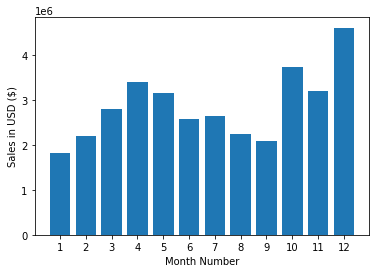

In [11]:
#Plotando os gráficos

months = range(1,13)
plt.bar(months,resultados['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()


* Faz sentido Dezembro ter um grande número de vendas, dado as festas de fim de ano

##### 2° Pergunta: Qual foi a cidade com o maior número de vendas? 

#### Criando uma coluna para as cidades

* Podemos usar .apply para aplicar uma operação para o data frame inteiro

In [12]:
#Função para extrair a cidade
def pegar_cidade(endereco):
    return endereco.split(",")[1]

#Podem haver duas cidades com o mesmo nome em estados diferentes, para evitar essa confusão, podemos adicionar a cidade e seu...
#... estado

#Função para extrair o extado
def pegar_estado(endereco):
    return endereco.split(",")[2].split(" ")[1]

# Juntando a cidade e o estado em uma nova coluna
sales_data["Cities"] = sales_data["Purchase Address"].apply(lambda x: f"{pegar_cidade(x)} ({pegar_estado(x)})" )
sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
217240,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
217241,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
217242,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [13]:
#Observando os valores de cada cidade
resultados = sales_data.groupby("Cities").sum()
resultados

,Quantity Ordered,Price Each,Month,Sales
Cities,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07
Austin (TX),11137,1808340.03,69720,1818044.33
Boston (MA),22494,3634398.40,140898,3658627.65
Dallas (TX),16707,2750026.38,104447,2765373.96
Los Angeles (CA),33247,5417171.70,208020,5448304.28
New York City (NY),27903,4632920.54,175557,4661867.14
Portland (ME),2746,446752.36,17119,449321.38
Portland (OR),11291,1859836.44,70517,1870010.56
San Francisco (CA),50169,8204001.38,314949,8254743.55


* Visualizando os valores em um gráfico

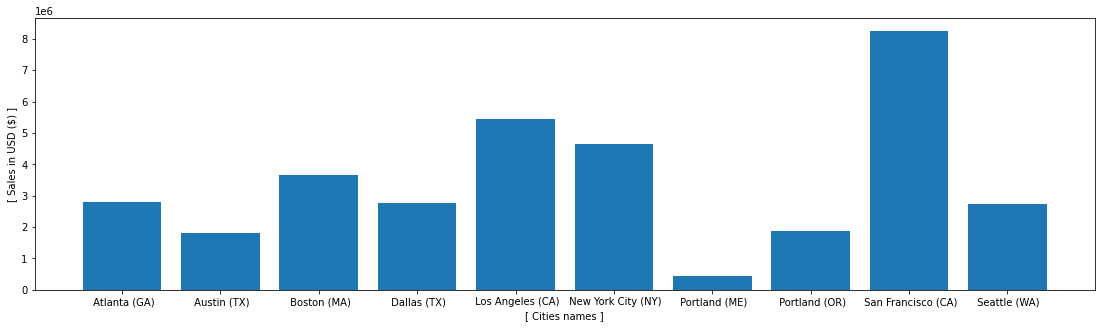

In [14]:
cities = [cidade for cidade, dataframe in sales_data.groupby("Cities") ]

plt.figure(figsize=(19,5))
plt.bar(cities,resultados['Sales'])
plt.xticks(cities)
#plt.xticks(cities, rotation = 'vertical', size = 8 )
plt.ylabel('[ Sales in USD ($) ]')
plt.xlabel('[ Cities names ]')
plt.show()



* Aqui podemos perceber que São Francisco foi a cidade com vendas melhores de produtos eletrônicos, uma das razões para isso, poderia ser por exemplo que o Vale do silicio localizado na cidade, necessita de vários equipamentos eletrônicos, ou talvez os tipos de comerciais nessa cidade sejam melhores, talvez as pessoas de cidade tenham mais dinheiro e etc.

#### 3° Pergunta: A que horas devemos exibir anúncios para maximizar a probabilidade de compra do produto pelo cliente?

In [15]:
#Convertendo a coluna Order Date de um tipo string para o tipo datetime, para facilitar a análise
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"], format='%m/%d/%y %H:%M')
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
217240,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
217241,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
217242,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


#### Criando as colunas com as horas e minutos

In [16]:
sales_data["Hours"] = sales_data["Order Date"].dt.hour
sales_data["Minutes"] = sales_data["Order Date"].dt.minute
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
217239,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
217240,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
217241,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
217242,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


* Plotando uma análise da quantidade de compras pelos horários

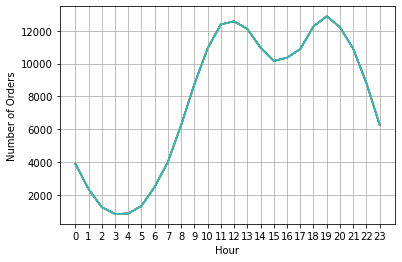

In [17]:
hours = [hora for hora, dataframe in sales_data.groupby("Hours") ]
plt.plot(hours,sales_data.groupby(["Hours"]).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()




* Podemos observar os picos se encontram, depois das 11 da manhã e depois das 6 da noite, uma observação para isso, é que esse seria o período em que as pessoas economicamente ativas estariam no horário de almoço e em casa depois do trabalho, respectivamente.

#### 4° Pergunta: Quais são os produtos que mais são vendidos juntos ?

* Podemos observar entre as colunas o atributo Order ID, que é a identificação para uma venda no geral, ou seja, se dois produtos tiverem o mesmo OrderId significa que foram vendidos juntos, portanto, se juntarmos todos os registros que possuem o mesmo Order Id, veremos quais produtos foram vendidos juntos

* Criando um dataframe com as linhas duplicadas para que vejamos as vendas com Order ID duplicado

In [18]:
df_dpl = sales_data[sales_data['Order ID'].duplicated(keep=False)]
df_dpl["Grouped"] = df_dpl.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df_dpl = df_dpl[['Order ID','Grouped']].drop_duplicates()
df_dpl

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
217155,259277,"iPhone,Wired Headphones"
217177,259297,"iPhone,Lightning Charging Cable"
217185,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
217197,259314,"Wired Headphones,AAA Batteries (4-pack)"


* Descobrindo qual conjunto de produtos aparece mais vezes

In [19]:
count = Counter()

for row in df_dpl["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


* Assim nós podemos recomendar por exemplo um 'Lightning Charging Cable' pra quem compra um 'iPhone', e assim por diante, possivelmente aumentando as vendas

#### 5° Pergunta: Qual o produto que mais vendeu?

In [20]:
sales_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hours,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


* Visualizando as quais produtos venderam mais

In [21]:
resultados = sales_data.groupby("Product").sum().reset_index()
resultados = resultados[["Product","Quantity Ordered"]]
resultados = resultados.sort_values(by=['Quantity Ordered'],ascending= False)
resultados

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


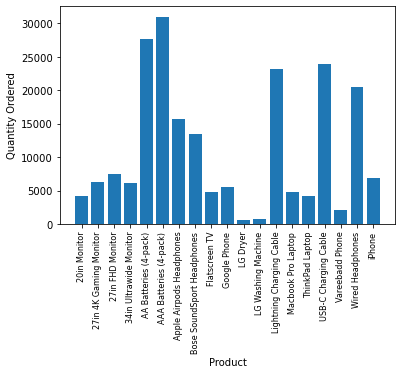

In [22]:
# Construindo um gráfico
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

produtos = [produto for produto, data_frame in product_group]

plt.bar(produtos, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(produtos, rotation='vertical',size=8)
plt.show()


In [ ]:
* AAA Batteries (4-pack) foi o item mais vendido, as baterias no geral são o que muitos eletrônicos precisam para funcionar Eesua vida útil não costuma durar tanto o que requer sempre a compra de baterias novas.
* O fato dos produtos do topo também serem mais baratos podem influir nesse resultado também.

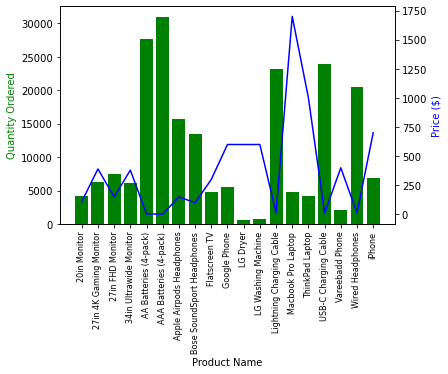

In [23]:
#Adicionando os preços de cada conjunto de produtos ao gráfico
precos = sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(produtos, quantity_ordered, color='g')
ax2.plot(produtos,precos,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(produtos,rotation="vertical",size=8)

plt.show()
#Observe o padrão, normalmente quando a quantidade de compra é alta o preço é baixo